### Binary Classifier with different initialization [Zeros, Random He paper]

#### import the required package 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

%matplotlib inline

#### load the dataset

In [2]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
  

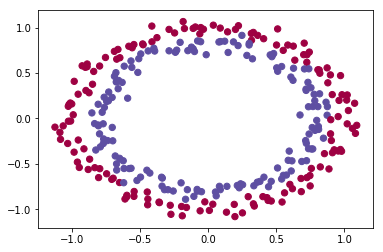

In [3]:
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_X = test_X.T
test_Y = test_Y.reshape((1, test_Y.shape[0]))

In [4]:
train_X.shape, test_X.shape

((2, 300), (2, 100))

In [5]:
m = 300
feature = 2

tf.reset_default_graph()

#### create the placeholder for input and output 

In [52]:
X = tf.placeholder(tf.float32,shape=[feature,None],  name='Input')
Y = tf.placeholder(tf.float32,shape=[1,None],  name='Output')

#### create parameter initializer for network with 3 layer neural network

#### Initialize with zero value all W

In [53]:
W1 = tf.Variable(tf.zeros(shape=[4,feature], dtype=tf.float32), name = 'Weight_layer_1')
b1 = tf.Variable(tf.zeros(shape=[4,1], dtype = tf.float32), name = 'bias_layer_1')

W2 = tf.Variable(tf.zeros(shape=[4,4], dtype= tf.float32), name = 'Weight_layer_2')
b2 = tf.Variable(tf.zeros(shape=[4,1], dtype= tf.float32), name = 'bias_layer_2')

W3 = tf.Variable(tf.zeros(shape=[1,4], dtype= tf.float32), name = 'Weight_layer_3')
b3 = tf.Variable(tf.zeros(shape=[1,1], dtype= tf.float32), name = 'bias_layer_3')

#### Forward propagation 

In [55]:
A0 = X

Z1 = tf.matmul(W1, X) + b1
A1 = tf.nn.relu(Z1, 'Activation_layer_1')

Z2 = tf.matmul(W2, A1) + b2
A2 = tf.nn.relu(Z2, 'Activation_layer_2')

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.nn.relu(Z3, 'Activation_layer_3')

#### calculate loss and use adam gradient optimizer

In [56]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits= A3, labels=Y, name = 'entropy')

loss = tf.reduce_mean(entropy, name = 'loss')

optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1= 0.9, beta2= 0.999, epsilon=0.1).minimize(loss)

init = tf.global_variables_initializer()

#### Initialize the hyperparameter

In [71]:
batch_size = 32
batch_iteration = 9

epoch = 100
iteration_cost =[]

In [77]:
with tf.Session() as sess:
    sess.run([init])
    
    for i in range(epoch):
        writer = tf.summary.FileWriter('./graphs/zero', sess.graph)
        for j in range(batch_iteration):
            _,l = sess.run([optimizer, loss], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]}) 
            iteration_cost.append(l)
        _,l = sess.run([optimizer, loss], {X:train_X[:,288:-1], Y:train_Y[:,288:-1]})   
        iteration_cost.append(l)
    writer.close()
    
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

In [66]:
! ls
! tensorboard --logdir="./graphs/zero" --port 6006


Binary_classifier_different_initialization.ipynb
C2W1_Assignment_Part1_Initialization.ipynb
C2W1_Assignment_Part2_Regularization.ipynb
C2W1_Assignment_Part3_Gradient+Checking.ipynb
C2W1_Quiz_Practical_aspects_of_deep_learning.txt
graphs
TensorBoard 0.1.5 at http://gideon-Aspire-V5-121:6006 (Press CTRL+C to quit) ^C



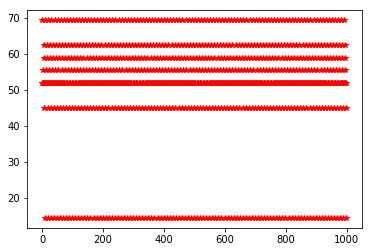

In [73]:
plt.plot(iteration_cost,'r*')

In [58]:
def relu(z):
    return np.maximum(0,z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
test = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])

sigmoid(test)

array([ 0.01798621,  0.04742587,  0.11920292,  0.26894142,  0.5       ,
        0.73105858,  0.88079708,  0.95257413,  0.98201379])

#### prediction error and training error

In [86]:

A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = relu(Z_3)

correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training accuracy ', correct_train_number / m)

Training accuracy  0.5


In [113]:

A_0 = test_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = relu(Z_3)

correct_test_number = np.sum(np.abs(test_Y - A_3) < 0.5)

print('Testing accuracy ', correct_test_number / 100)

Testing accuracy  0.5


In [6]:
tf.reset_default_graph()

In [7]:
X = tf.placeholder(tf.float32,shape=[feature,None],  name='Input')
Y = tf.placeholder(tf.float32,shape=[1,None],  name='Output')

###  Initialize with based on he random number

In [66]:
W1 = tf.Variable(tf.random_normal(shape=[4,feature],seed = 1)* np.sqrt(1 / feature), dtype=tf.float32, name = 'Weight_layer_1')
b1 = tf.Variable(tf.zeros(shape=[4,1], dtype = tf.float32), name = 'bias_layer_1')

W2 = tf.Variable(tf.random_normal(shape=[4,4], seed = 2)* np.sqrt(1 / 4) , dtype= tf.float32, name = 'Weight_layer_2')
b2 = tf.Variable(tf.zeros(shape=[4,1], dtype= tf.float32), name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal(shape=[1,4],seed = 3), dtype= tf.float32, name = 'Weight_layer_3')
b3 = tf.Variable(tf.zeros(shape=[1,1], dtype= tf.float32), name = 'bias_layer_3')

In [67]:
A0 = X

Z1 = tf.matmul(W1, X) + b1
A1 = tf.nn.relu(Z1, 'Activation_layer_1')

Z2 = tf.matmul(W2, A1) + b2
A2 = tf.nn.relu(Z2, 'Activation_layer_2')

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.sigmoid(Z3, 'Activation_layer_3')

In [68]:
batch_size = 32
batch_iteration = 9

epoch = 100
iteration_cost =[]

In [69]:
loss = tf.reduce_mean(Y * tf.log(A3) + (1 - Y) * tf.log(1 - A3)) * (-1)

optimizer = tf.train.AdamOptimizer(learning_rate=0.01, beta1= 0.9, beta2= 0.999, epsilon=1e-04).minimize(loss)


init = tf.global_variables_initializer()

In [70]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        writer = tf.summary.FileWriter('./graphs/random', sess.graph)
        for j in range(batch_iteration):
            _,l = sess.run([optimizer, loss], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]}) 
            iteration_cost.append(l)
        _,l = sess.run([optimizer, loss], {X:train_X[:,288:-1], Y:train_Y[:,288:-1]})   
        iteration_cost.append(l)
    writer.close()
    
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

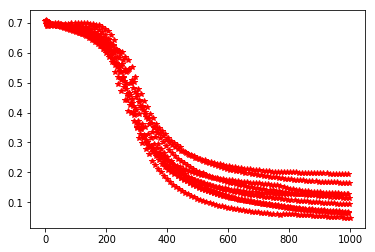

In [71]:
plt.plot(iteration_cost,'r*')

#### prediction error and testing error

In [77]:
A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3), 

correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training accuracy ', correct_train_number / m)

Training accuracy  0.973333333333


In [78]:
A_0 = test_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

correct_test_number = np.sum(np.abs(test_Y - A_3) < 0.5)

print('Testing accuracy ', correct_test_number / 100)

Testing accuracy  0.94


In [79]:
x = []
val = np.arange(-1.5,1.5,.1)
for i in val:
    for j in val:
        x.append([i, j])

A_0 = np.array(x).T

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

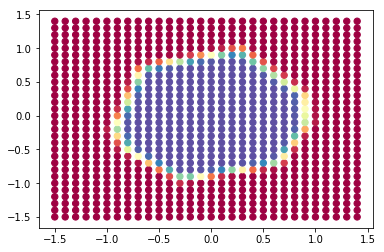

In [80]:
# Visualize the data
plt.scatter(A_0[0, :], A_0[1, :], c=A_3[0,:], s=40, cmap=plt.cm.Spectral);

#### Comment
#### Zero initialization gives symmetry, hidden layer does not learn anything.
### He initialization perform better than random initialization.
#### Finally, our training accuracy is 97 while testing accuracy is 94, there is still room for improvement. 